# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [1]:
import numpy
from matplotlib import pyplot as plt 


To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [2]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        # YOUR CODE HERE
        positions[0]=self.pos
        for i in range(1,n+1):
            istep = numpy.random.choice(range(self.npossible))
            positions[i]=positions[i-1]+self.possibleSteps[istep]

        #print(numpy.sum(positions.T[:,3]**2) ) 
    
        return positions

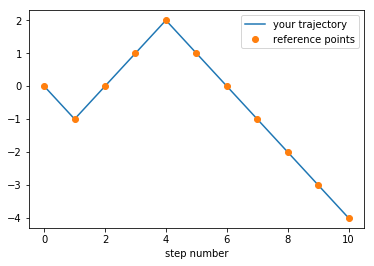

In [3]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

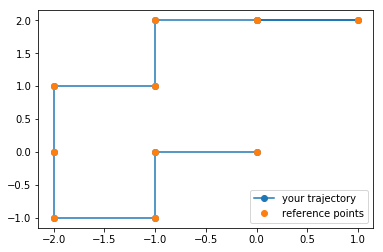

In [4]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

4.0
[[2.  0.1]
 [2.  0.1]
 [2.  0.1]
 [2.  0.1]
 [2.  0.1]
 [2.  0.1]
 [2.  0.1]
 [2.  0.1]
 [2.  0.1]
 [2.  0.1]]


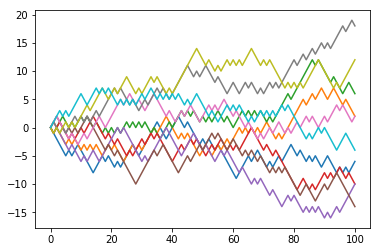

In [5]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)
    
    
    
a = numpy.zeros((10, 2))
a[:, 0] = 2.0
a[:, 1] = 0.1
y=numpy.mean(a)
z=numpy.mean(a[:,0]**2)
print(z)
print(a)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


Text(0,0.5,'Average')

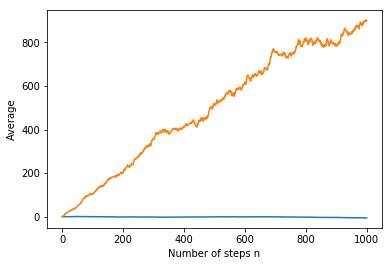

In [7]:
nsteps = 1000
ndim = 1
nwalkers = 100

w = walker(numpy.zeros(ndim),ndim)

steps=numpy.arange(0,nsteps+1,1)

all_positions=numpy.empty([nwalkers,nsteps+1])
x_av=[]
x2_av=[]
for i in range(nwalkers):
    all_positions[i:,]=w.doSteps(nsteps).T
for k in range(nsteps+1):
    x_av.append(numpy.mean(all_positions[:,k]))
    x2_av.append(numpy.average(all_positions[:,k]**2))

plt.plot(steps,x_av)
plt.plot(steps,x2_av)
plt.xlabel('Number of steps n')
plt.ylabel('Average')

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


In [15]:
nsteps = 100
nwalkers = 400
dimensions = range(1,5)
steps=numpy.arange(0,nsteps+1,1)

#Code that generates values for 1 dimension
w = walker(numpy.zeros(1),ndim=1)
all_positions=numpy.empty([nwalkers,nsteps+1])
x1_av=[]
for m in range(0,400):
    for k in range(nsteps+1):
        all_positions[m,k]=(numpy.sum((w.doSteps(nsteps).T)[:,k]**2))
for s in range(nsteps+1):
    x1_av.append(numpy.average(all_positions[:,s]))


#Code that generates values for 2 dimensions
w = walker(numpy.zeros(2),ndim=2)
all_positions=numpy.empty([nwalkers,nsteps+1])
x2_av=[]
for m in range(0,400):
    for k in range(nsteps+1):
        all_positions[m,k]=(numpy.sum((w.doSteps(nsteps).T)[:,k]**2))
for s in range(nsteps+1):
    x2_av.append(numpy.average(all_positions[:,s]))

#Code that generates values for 3 dimensions
w = walker(numpy.zeros(3),ndim=3)
all_positions=numpy.empty([nwalkers,nsteps+1])
x3_av=[]
for m in range(0,400):
    for k in range(nsteps+1):
        all_positions[m,k]=(numpy.sum((w.doSteps(nsteps).T)[:,k]**2))
for s in range(nsteps+1):
    x3_av.append(numpy.average(all_positions[:,s]))
    
    
#Code thatgenerates values for 4 dimensions
w = walker(numpy.zeros(4),ndim=4)
all_positions=numpy.empty([nwalkers,nsteps+1])
x4_av=[]
for m in range(0,400):
    for k in range(nsteps+1):
        all_positions[m,k]=(numpy.sum((w.doSteps(nsteps).T)[:,k]**2))
for s in range(nsteps+1):
    x4_av.append(numpy.average(all_positions[:,s]))


#for j in range(1,5):
    #w = walker(numpy.zeros(j),ndim=j)
    #all_positions=numpy.empty([nwalkers,nsteps+1])
    #x2_av=[]
    #for i in range(nwalkers):
        #print((w.doSteps(nsteps).T))
        #print(all_positions[1:,])
        
        #for k in range(nsteps+1):
            #all_positions[w.doSteps(nsteps).T[:,k]
            #x_av.append(numpy.mean(all_positions[:,k]))
            #x2_av.append(numpy.average(w.doSteps(nsteps).T[:,k]))
        

ValueError: x and y must have same first dimension, but have shapes (101,) and (40400,)

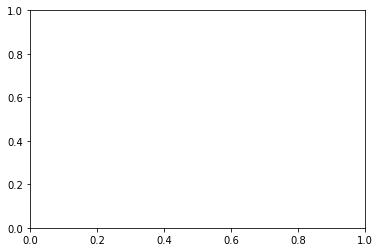

In [14]:
plt.plot(steps,x1_av)
plt.plot(steps,x2_av)
plt.plot(steps,x3_av)
plt.plot(steps,x4_av)
plt.title('400 walkers in 4 dimensions')
plt.xlabel('Number of steps n')
plt.ylabel('Average square distance')
plt.legend(["1D","2D ","3D",'4D'])

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


0 10
0 10
1 100
1 100
2 500
2 500


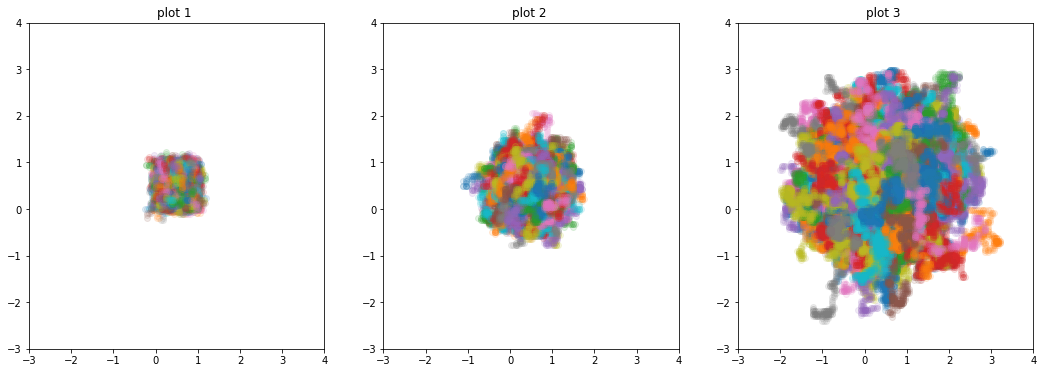

In [43]:
ndim=2
nwalkers=1000

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))


# this code is a template to create 3 subplots in one, adapt it to your task!
plt.figure(figsize=(18,6))

for i, nsteps in enumerate([10,100,500]):
    plt.subplot(131+i)
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.title("plot {} ".format(i+1))    
    plt.scatter(rand_pos[:,0], rand_pos[:,1], alpha=0.13)
    print(i,nsteps)
    
    all_positions=numpy.zeros((2*nwalkers,nsteps+1))
    pos=numpy.empty((nwalkers,ndim))
    for m in range(nwalkers):
        starting_point=numpy.array([rand_pos[m,0],rand_pos[m,1]])
        w = walker(starting_point,ndim,step_size=0.05)
    
        x,y=(w.doSteps(nsteps).T)
        all_positions[2*m,:]=x
        all_positions[2*m+1,:]=y
        
    for s in range(nwalkers):
        plt.scatter(all_positions[2*s,:],all_positions[(2*s)+1,:],alpha=0.13)
    print(i,nsteps)

